# Microsoft Student Partners(MSP) Korea
# Reinforcement Learning

In [1]:
# Environment Settings
# Import modules

# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline

# Load OpenAI Gym
import gym
import numpy as np

import random
import math

In [3]:
# Load OpenAI Gym's Environment
# Environment title 'CartPole-v0'
env = gym.make('CartPole-v0')

# Modify environment to expand steps(500) at each episode
env._max_episode_steps = 500

# Defining the environment related constants
# Number of discrete states (bucket) per state dimension
NUM_BUCKETS = (1, 1, 6, 3)  # (x, x', theta, theta')

# Number of discrete actions
NUM_ACTIONS = env.action_space.n # (left, right)

# Bounds for each discrete state
STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
STATE_BOUNDS[1] = [-0.5, 0.5]
STATE_BOUNDS[3] = [-math.radians(50), math.radians(50)]

# Index of the action
ACTION_INDEX = len(NUM_BUCKETS)

In [4]:
# Defining the Q-learning related constants
# import numpy as np

## Creating a Q-Table for each state-action pair
q_table = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,))

## Defining the Learning related constants
MIN_EXPLORE_RATE = 0.01
MIN_LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.99

## Defining the simulation related constants
MAX_EPISODES = 1000     # 몇 번이나 기회를 줄까?
MAX_STEPS = 550         # 이정도면 잘 버텼다!
SOLVED_STEPS = 499      # 이정도면 잘 버텼다!
STREAK_TO_END = 120

In [5]:
record = []


# Implement Sub-modules
# Get learning related values at the given time t
""" import math """
# Decreasing exploring rate over time t
def get_explore_rate(t):
    # if t >= 24:
    if t >= 5:
        # Does not decreas below the MIN_EXPLORE_RATE
        return max(MIN_EXPLORE_RATE, min(1, 1.0 - math.log10((t+1)/25)))
    else:
        return 1.0

# Decreasing learning rate over time t
def get_learning_rate(t):
    # if t >= 24:
    if t >= 5:
        # Does not decreas below the MIN_LEARNING_RATE
         return max(MIN_LEARNING_RATE, min(0.5, 1.0 - math.log10((t+1)/25)))
    else:
         return 1.0

# Get the most proper action at the given state
# import numpy as np
# import random
def select_action(state, explore_rate):
    """ Code Start """

    # Select a random action : Epsilon-greedy
    if random.random() < explore_rate:
        action = env.action_space.sample()

    # Select the action with the highest q
    else:
        action = np.argmax(q_table[state])

    """ Code End """
    return action

# Convert observation to state
def observation_to_state(observation):
    state = []
    for i in range(len(observation)):
        if observation[i] <= STATE_BOUNDS[i][0]:
            bucket_index = 0
        elif observation[i] >= STATE_BOUNDS[i][1]:
            bucket_index = NUM_BUCKETS[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = STATE_BOUNDS[i][1] - STATE_BOUNDS[i][0]
            offset = (NUM_BUCKETS[i]-1)*STATE_BOUNDS[i][0]/bound_width
            scaling = (NUM_BUCKETS[i]-1)/bound_width
            bucket_index = int(round(scaling*observation[i] - offset))
        state.append(bucket_index)
    return tuple(state)


# Simulate Q-Learning
def simulate():
    num_streaks = 0

    for episode in range(MAX_EPISODES):
        """ Code Start """

        # Initiate learning related values
        explore_rate = get_explore_rate(episode)
        learning_rate = get_learning_rate(episode)

        """ Code End """

        # Reset the environment
        obv = env.reset()
        state_prev = observation_to_state(obv)

        for step in range(MAX_STEPS):
            """ Code Start """

            # Select an action
            action = select_action(state_prev, explore_rate)

            # Execute the action
            obv, reward, done, _ = env.step(action)

            # Observe the result
            state_next = observation_to_state(obv)

            # Update the Q based on the result
            best_q = np.amax(q_table[state_next])
            q_table[state_prev + (action,)] += learning_rate * (reward + DISCOUNT_FACTOR * best_q - q_table[state_prev + (action,)])

            """ Code End """
            # Setting up for the next iteration
            state_prev = state_next

            if done:
                record.append(step)
                print("Episode %d finished after %f time steps" % (episode, step))
                if (step >= SOLVED_STEPS):
                    num_streaks += 1
                else:
                    num_streaks = 0
                break

        # It's considered done when it's solved over STREAK_TO_END times consecutively
        if num_streaks > STREAK_TO_END:
            break

In [6]:
# Visualize time-reward Graph
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline    # 주피터 노트북 상에서 그래프를 표현하기 위한 라인

def visualize():
    plt.figure(figsize=(20,8))
    plt.plot(range(len(record)), record)
    plt.show()

if __name__ == "__main__":
    simulate()
    

Episode 0 finished after 9.000000 time steps
Episode 1 finished after 14.000000 time steps
Episode 2 finished after 48.000000 time steps
Episode 3 finished after 33.000000 time steps
Episode 4 finished after 9.000000 time steps
Episode 5 finished after 16.000000 time steps
Episode 6 finished after 36.000000 time steps
Episode 7 finished after 32.000000 time steps
Episode 8 finished after 20.000000 time steps
Episode 9 finished after 15.000000 time steps
Episode 10 finished after 14.000000 time steps
Episode 11 finished after 20.000000 time steps
Episode 12 finished after 23.000000 time steps
Episode 13 finished after 11.000000 time steps
Episode 14 finished after 16.000000 time steps
Episode 15 finished after 10.000000 time steps
Episode 16 finished after 9.000000 time steps
Episode 17 finished after 30.000000 time steps
Episode 18 finished after 14.000000 time steps
Episode 19 finished after 18.000000 time steps
Episode 20 finished after 34.000000 time steps
Episode 21 finished after 

Episode 188 finished after 499.000000 time steps
Episode 189 finished after 499.000000 time steps
Episode 190 finished after 499.000000 time steps
Episode 191 finished after 499.000000 time steps
Episode 192 finished after 499.000000 time steps
Episode 193 finished after 499.000000 time steps
Episode 194 finished after 499.000000 time steps
Episode 195 finished after 499.000000 time steps
Episode 196 finished after 499.000000 time steps
Episode 197 finished after 499.000000 time steps
Episode 198 finished after 499.000000 time steps
Episode 199 finished after 499.000000 time steps
Episode 200 finished after 499.000000 time steps
Episode 201 finished after 499.000000 time steps
Episode 202 finished after 499.000000 time steps
Episode 203 finished after 499.000000 time steps
Episode 204 finished after 499.000000 time steps
Episode 205 finished after 499.000000 time steps
Episode 206 finished after 499.000000 time steps
Episode 207 finished after 499.000000 time steps
Episode 208 finished

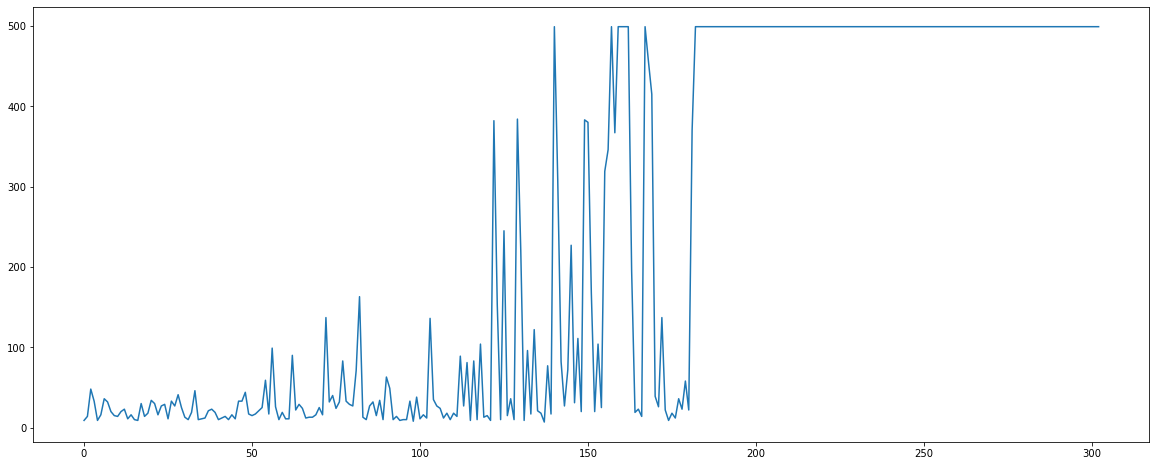

In [7]:
    visualize()